# Where Should I Live

### Install and import all libraries needed to complete this project

In [3]:
# @hidden_cell
# The project token is an authorization token that is used to access project resources like data sources, connections, and used by platform APIs.
#from project_lib import Project
#project = Project(project_id='5049753b-615f-46ea-a017-c4b12f161327', project_access_token='p-648fae1253fab7c7b90df6e99b59377f027d30ab')
#pc = project.project_context
import pandas as pd
import requests # library to handle requests
!conda install -c conda-forge geopy --yes
from  geopy.geocoders import Nominatim
!pip install folium
import folium 
!pip install tabula-py
from tabula import read_pdf
import tabula
import warnings
warnings.filterwarnings("ignore")

Solving environment: done

# All requested packages already installed.



### Fetch Range of appartment prices in beirut city from Blom Invest real estate study and insert in data frame called 'beirut_prices'

In [4]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
url = "In-Depth-Review-of-the-Lebanese-Real-Estate-Sector-in-2015.pdf"
df_prices = tabula.read_pdf(url,stream=True,pages='12')
df_prices = df_prices[0].loc[4:]
df_prices.rename(columns={'Unnamed: 0':'Area','Unnamed: 1':'Average Price per SQM','Average':'Average Size of Apparment m2','Unnamed: 2':'Average Sale Price'}, inplace=True)
nanval = df_prices[df_prices['Area'].isnull() | df_prices['Average Price per SQM'].isnull()]
not_nan_val = df_prices[df_prices['Area'].notnull() & df_prices['Average Price per SQM'].notnull()]
nanval1 = nanval[nanval['Average Price per SQM'].notna()]
nanval2 = nanval[nanval['Area'].notna()]
nanval1.reset_index(inplace=True,drop=True)
count = 0
while count < len(nanval2)-1:
    nanval2.iloc[count,0] = nanval2.iloc[count,0]+' '+nanval2.iloc[count+1,0]
    nanval2.drop(nanval2.index[count+1],axis=0,inplace=True)
    count = count+1
nanval2.reset_index(inplace=True,drop=True)
nanval1['Area'] = nanval2['Area']
df_prices.dropna(inplace=True)
frames = [nanval1,df_prices] # cleaned data
beirut_prices = pd.concat(frames)
beirut_prices['Area'] = beirut_prices.Area.str.replace(' - ',',')
beirut_prices['Area'].replace('Beirut Central District','Beirut Downtown',inplace=True)
beirut_prices.drop([1 ,18], inplace=True)
beirut_prices.reset_index(drop=True,inplace=True)
beirut_prices.head()

Got stderr: May 14, 2020 12:21:55 PM org.apache.pdfbox.pdmodel.font.PDTrueTypeFont <init>
May 14, 2020 12:21:55 PM org.apache.pdfbox.pdmodel.font.PDCIDFontType2 <init>
INFO: OpenType Layout tables used in font Times New Roman are not implemented in PDFBox and will be ignored
May 14, 2020 12:21:55 PM org.apache.pdfbox.pdmodel.font.PDTrueTypeFont <init>
May 14, 2020 12:21:56 PM org.apache.pdfbox.pdmodel.font.PDTrueTypeFont <init>
May 14, 2020 12:22:00 PM org.apache.pdfbox.pdmodel.font.PDTrueTypeFont <init>
May 14, 2020 12:22:00 PM org.apache.pdfbox.pdmodel.font.PDCIDFontType2 <init>
INFO: OpenType Layout tables used in font Times New Roman are not implemented in PDFBox and will be ignored
May 14, 2020 12:22:00 PM org.apache.pdfbox.pdmodel.font.PDTrueTypeFont <init>
May 14, 2020 12:22:00 PM org.apache.pdfbox.pdmodel.font.PDTrueTypeFont <init>
May 14, 2020 12:22:05 PM org.apache.pdfbox.pdmodel.font.PDTrueTypeFont <init>
May 14, 2020 12:22:05 PM org.apache.pdfbox.pdmodel.font.PDCIDFontType2

,Area,Average Price per SQM,Average Size of Apparment m2,Average Sale Price
0,"Georges Haimari,Sassine","$4,200",358,"$1,503,600"
1,"Rizk Hospital,Nazareth,Corniche du Fleuve","$2,950",206,"$607,700"
2,Ramlet el Baida,"$6,750",414,"$2,794,500"
3,Manara,"$6,250",424,"$2,650,000"
4,Beirut Downtown,"$6,000",333,"$1,998,000"


### Use Nominatim geocoder to Fetch area points coordinates in Beirut and put in in 'beirut_coor' dataframe

In [6]:
beirut_lat =[]
beirut_long =[]
city ="Beirut"
country ="Lebanon"
geolocator = Nominatim()
for i in beirut_prices['Area']:
    if ',' in i:
        i=i.split(',')[0]
    print(i)
    loc = geolocator.geocode(i+' , '+city+' , '+ country) 
    beirut_lat.append(loc.latitude)
    beirut_long.append(loc.longitude)
    print("for ",i,"latitude is :-" ,loc.latitude,"\nlongtitude is:-" ,loc.longitude)

dict = {'Area': beirut_prices['Area'], 'Latitude': beirut_lat, 'Longitude': beirut_long}  
beirut_coor = pd.DataFrame(dict) 


Georges Haimari
for  Georges Haimari latitude is :- 33.8872679 
longtitude is:- 35.5177897
Rizk Hospital
for  Rizk Hospital latitude is :- 33.88532815000001 
longtitude is:- 35.5154515956372
Ramlet el Baida
for  Ramlet el Baida latitude is :- 33.877041 
longtitude is:- 35.48054179274821
Manara
for  Manara latitude is :- 33.8946183 
longtitude is:- 35.47214376518849
Beirut Downtown
for  Beirut Downtown latitude is :- 33.90127995 
longtitude is:- 35.50299436667265
Ain el Mreisseh
for  Ain el Mreisseh latitude is :- 33.90086675 
longtitude is:- 35.48958394963451
Raouche
for  Raouche latitude is :- 33.88655125 
longtitude is:- 35.47461903309546
Sursock
for  Sursock latitude is :- 33.892964500000005 
longtitude is:- 35.516356345000005
Saifi
for  Saifi latitude is :- 33.8928947 
longtitude is:- 35.508684393443076
Verdun
for  Verdun latitude is :- 33.8857678 
longtitude is:- 35.4826958
Clemenceau
for  Clemenceau latitude is :- 33.8980556 
longtitude is:- 35.4889101
Tallet el-Khayat
for  Talle

### Add some locations and prices from 'Databank' credit libanais study

In [7]:
beirut_areas = pd.merge(beirut_prices,beirut_coor)
#For more consistancy will add some areas in beirut i found in different sources. Its a waste of time if i write a method to automate
#The data mining process. I just insert the values in a dictionary and append to the dataFrame
dict_added = ({'Area': 'Mazraa','Average Price per SQM': '$1,960','Average Size of Apparment m2': '190','Average Sale Price': '$375,000', 'Latitude': '33.878202', 'Longitude': '35.501877'},{'Area': 'Zqaq el Blat','Average Price per SQM': '$2000','Average Size of Apparment m2': '200','Average Sale Price': '$400,000', 'Latitude': '33.891260', 'Longitude': '35.498409'} ,{'Area': 'Mar Elias Msaytbeh','Average Price per SQM': '$2,000','Average Size of Apparment m2': '160','Average Sale Price': '$320,000', 'Latitude': '33.886246', 'Longitude': '35.495267'},{'Area': 'Ras Beirut','Average Price per SQM': '$5,200','Average Size of Apparment m2': '380','Average Sale Price': '$1,976,000', 'Latitude': '33.898091', 'Longitude': '35.473557'})
new_areas=pd.DataFrame(dict_added)
beirut_areas = beirut_areas.append(new_areas)
beirut_areas.reset_index(drop=True,inplace=True)
beirut_areas.head()

,Area,Average Price per SQM,Average Size of Apparment m2,Average Sale Price,Latitude,Longitude
0,"Georges Haimari,Sassine","$4,200",358,"$1,503,600",33.8873,35.5178
1,"Rizk Hospital,Nazareth,Corniche du Fleuve","$2,950",206,"$607,700",33.8853,35.5155
2,Ramlet el Baida,"$6,750",414,"$2,794,500",33.877,35.4805
3,Manara,"$6,250",424,"$2,650,000",33.8946,35.4721
4,Beirut Downtown,"$6,000",333,"$1,998,000",33.9013,35.503


### View Beirut Areas on Map

In [8]:
city ="Beirut"
country ="Lebanon"
geolocator = Nominatim()
loc = geolocator.geocode(city+' , '+ country) 
beirut_lat.append(loc.latitude)
beirut_long.append(loc.longitude)
print("for Beirut latitude is :-" ,loc.latitude,"\nlongtitude is:-" ,loc.longitude)

Map= folium.Map(location=[loc.latitude, loc.longitude], zoom_start=14) # generate map centred to Toronto City
# add circle markers
for lat, lng, label in zip(beirut_areas['Latitude'], beirut_areas['Longitude'],beirut_areas['Area']):
        folium.CircleMarker(
            [float(lat), float(lng)],
            radius=5,
            popup=label,
            fill=True,
            color='blue',
            fill_color='blue',
            fill_opacity=0.6).add_to(Map)
Map

for Beirut latitude is :- 33.8959203 
longtitude is:- 35.47843


### Add Rental prices per area. Rental prices are estimated to be from 3 to 5% of the appartment selling price calculated annual.

In [9]:
#I will take the mean which is 4% price per square meter and will divide apprment for 50 and 100 meter appartments. an multiply it by appartment price /12 to get the monthly price
#beirut_areas['Average Rental Price 70M Appartment'] = ((beirut_areas['Average Price per SQM'].replace(",", "",regex= True).replace("\$", "",regex= True).astype(float) * 0.05 /12)*70).astype(int)
beirut_areas['Average Rental Price 100M Appartment'] = ((beirut_areas['Average Price per SQM'].replace(",", "",regex= True).replace("\$", "",regex= True).astype(float) * 0.04 /12)*100).astype(int)
#beirut_areas['Average Rental Price 160M Appartment'] = ((beirut_areas['Average Price per SQM'].replace(",", "",regex= True).replace("\$", "",regex= True).astype(float) * 0.05 /12)*160).astype(int)

beirut_areas.head()

,Area,Average Price per SQM,Average Size of Apparment m2,Average Sale Price,Latitude,Longitude,Average Rental Price 100M Appartment
0,"Georges Haimari,Sassine","$4,200",358,"$1,503,600",33.8873,35.5178,1400
1,"Rizk Hospital,Nazareth,Corniche du Fleuve","$2,950",206,"$607,700",33.8853,35.5155,983
2,Ramlet el Baida,"$6,750",414,"$2,794,500",33.877,35.4805,2250
3,Manara,"$6,250",424,"$2,650,000",33.8946,35.4721,2083
4,Beirut Downtown,"$6,000",333,"$1,998,000",33.9013,35.503,2000


### Fetch all foursquare categories around all areas in beirut and put in in 'df_cat' dataframe

In [10]:
##Define firts foursquare API calls credentials
CLIENT_ID = 'ZQYZUVJNNZNSIDV34CKP5Z34NGU2RI12TJDRGGF13LLI25TM'
CLIENT_SECRET = 'FCNT3KN50H454BNCDKR0EPMRPL2PXZVWBBGF1BTGPW0LVIM3'
VERSION = '20180605' 
Radius =500
cat = []
for lat,long in zip(beirut_areas['Latitude'],beirut_areas['Longitude']):
    url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, VERSION, lat,long, Radius, 200)
    results = requests.get(url).json()
    i=0
    for result in results['response']['venues']:
        if len(results['response']['venues'][i]['categories']) != 0:
            cat.append(results['response']['venues'][i]['categories'][0]['name'])
        i=i+1

df_cat = pd.DataFrame(cat)
df_cat



,0
0,Restaurant
1,Gym / Fitness Center
2,Hotel
3,Other Great Outdoors
4,Other Great Outdoors
...,...
2555,Café
2556,Mediterranean Restaurant
2557,Office
2558,Frozen Yogurt Shop


### Get all nearby venues for each area in beirut and put in dataframe 'beirut_venues'

In [11]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            100)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name'],
            v['venue']['categories'][0]['id']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Area',
                  'Area Latitude', 
                  'Area Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category',
                  'id']
    
    return(nearby_venues)

In [12]:
beirut_venues = getNearbyVenues(names=beirut_areas['Area'],
                                   latitudes=beirut_areas['Latitude'],
                                   longitudes=beirut_areas['Longitude']
                                  )
beirut_venues

Georges Haimari,Sassine
Rizk Hospital,Nazareth,Corniche du Fleuve
Ramlet el Baida
Manara
Beirut Downtown
Ain el Mreisseh
Raouche,Sakiet el Janzir
Sursock
Saifi
Verdun,Ain el Tineh
Clemenceau,Kantari
Tallet el-Khayat
Furn el Hayek
Koraytem
Hamra
Gemmayzeh
Sanayeh,Spears
Mar Mitr
Sodeco,Monnot
Mar Mikhael,Kobayate
Badaro
Sioufi,Hay Sirian
La Sagesse,Geitaoui
Mazraa
Zqaq el Blat
Mar Elias Msaytbeh
Ras Beirut


,Area,Area Latitude,Area Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,id
0,"Georges Haimari,Sassine",33.8873,35.5178,cantina sociale,33.886957,35.518314,Gastropub,4bf58dd8d48988d155941735
1,"Georges Haimari,Sassine",33.8873,35.5178,Spinneys Ashrafieh Tilal Beirut,33.888148,35.516906,Convenience Store,4d954b0ea243a5684a65b473
2,"Georges Haimari,Sassine",33.8873,35.5178,The Malt Gallery,33.886904,35.515396,Liquor Store,4bf58dd8d48988d186941735
3,"Georges Haimari,Sassine",33.8873,35.5178,ABC,33.888474,35.519686,Shopping Mall,4bf58dd8d48988d1fd941735
4,"Georges Haimari,Sassine",33.8873,35.5178,Librairie Antoine,33.888588,35.519229,Bookstore,4bf58dd8d48988d114951735
...,...,...,...,...,...,...,...,...
1117,Ras Beirut,33.898091,35.473557,Lamb House,33.895745,35.470536,Restaurant,4bf58dd8d48988d1c4941735
1118,Ras Beirut,33.898091,35.473557,-PitchBlue-,33.901304,35.472828,Nightclub,4bf58dd8d48988d11f941735
1119,Ras Beirut,33.898091,35.473557,Hotel Mediterranee Beirut,33.895496,35.470835,Hotel,4bf58dd8d48988d1fa931735
1120,Ras Beirut,33.898091,35.473557,Corniche El Manara,33.901458,35.474413,Beach,4bf58dd8d48988d1e2941735


## Analyze Data

### Create Dataframe beirut where it contains each area in beirut, all and unique venues, along with price range in beirut and called the dataFrame 'Beirut'

In [13]:
#print('There are {} uniques categories.'.format(len(beirut_venues['Venue Category'].unique())))
total_cat = beirut_venues.groupby('Area').count()['Venue Category'].reset_index(name ='Total No of Venues')
unique_cat = beirut_venues.groupby('Area')['Venue Category'].nunique().reset_index(name ='Unique Venues')
tot_uniq = pd.merge(total_cat,unique_cat)
beirut = pd.merge(beirut_areas,tot_uniq)
beirut.head(10)

,Area,Average Price per SQM,Average Size of Apparment m2,Average Sale Price,Latitude,Longitude,Average Rental Price 100M Appartment,Total No of Venues,Unique Venues
0,"Georges Haimari,Sassine","$4,200",358,"$1,503,600",33.8873,35.5178,1400,31,25
1,"Rizk Hospital,Nazareth,Corniche du Fleuve","$2,950",206,"$607,700",33.8853,35.5155,983,32,22
2,Ramlet el Baida,"$6,750",414,"$2,794,500",33.877,35.4805,2250,7,5
3,Manara,"$6,250",424,"$2,650,000",33.8946,35.4721,2083,41,23
4,Beirut Downtown,"$6,000",333,"$1,998,000",33.9013,35.503,2000,100,42
5,Ain el Mreisseh,"$5,750",412,"$2,369,000",33.9009,35.4896,1916,54,28
6,"Raouche,Sakiet el Janzir","$5,400",352,"$1,900,800",33.8866,35.4746,1800,27,15
7,Sursock,"$5,150",297,"$1,529,550",33.893,35.5164,1716,48,29
8,Saifi,"$4,900",179,"$877,100",33.8929,35.5087,1633,52,26
9,"Verdun,Ain el Tineh","$4,575",313,"$1,431,975",33.8858,35.4827,1525,47,26


### Visualizing Veneus in each area in Beirut

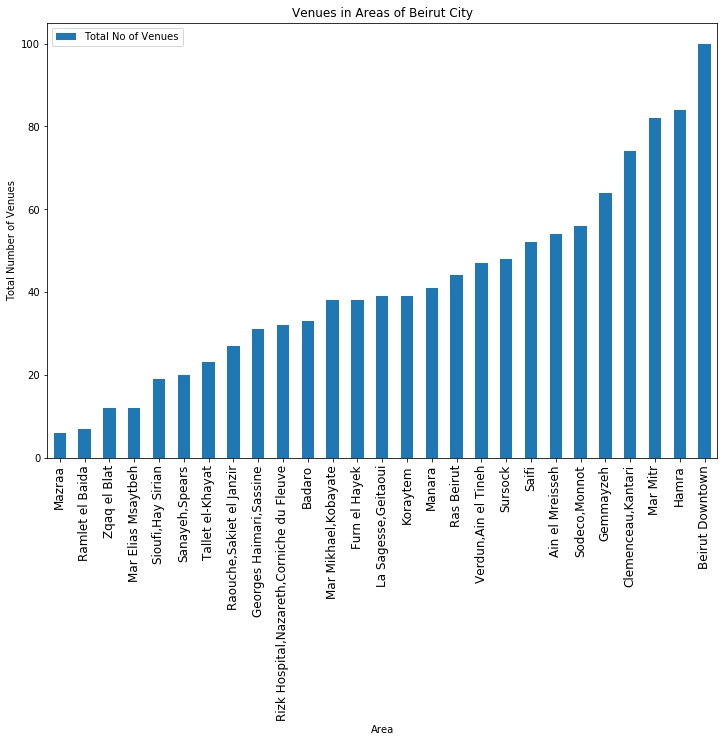

In [14]:
import matplotlib.pyplot as plt
hist = beirut[['Area','Total No of Venues']].sort_values('Total No of Venues',ascending=True)
hist = hist.set_index('Area')
hist.plot(kind='bar', figsize=(12, 8))
plt.ylabel('Total Number of Venues') # add y-label to the plot
plt.xticks(fontsize=12, rotation=90)
plt.title('Venues in Areas of Beirut City') # add title to the plot
plt.show()

### See if there is a correlation between price of area of living with the number of venues around 

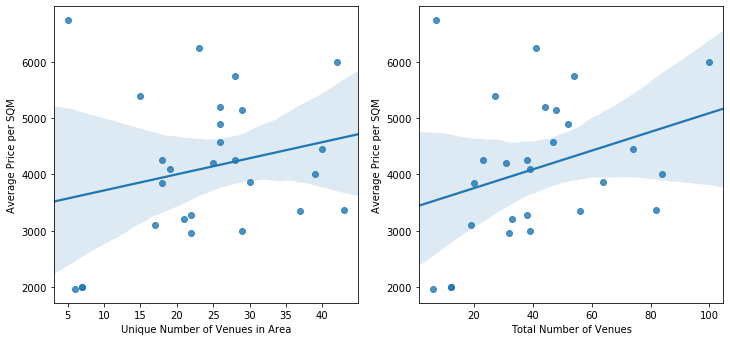

In [15]:
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

#regr = linear_model.LinearRegression()
x = beirut[['Unique Venues']]
x1 = beirut[['Total No of Venues']]
y = beirut['Average Price per SQM'].replace('\$','',regex=True).replace(',','',regex=True).astype(int)
fig = plt.figure(figsize=(12, 12))
plt.subplot(2,2,1)
sns.regplot(x,y)
plt.xlabel('Unique Number of Venues in Area') # add y-label to the plot

plt.subplot(2,2,2)
plt.xlabel('Total Number of Venues') # add y-label to the plot

sns.regplot(x1,y)

### Now remove ramlet el baida which is a quite district (no venues around) but its the Champs-Elyse of beirut (very classy and rich community)

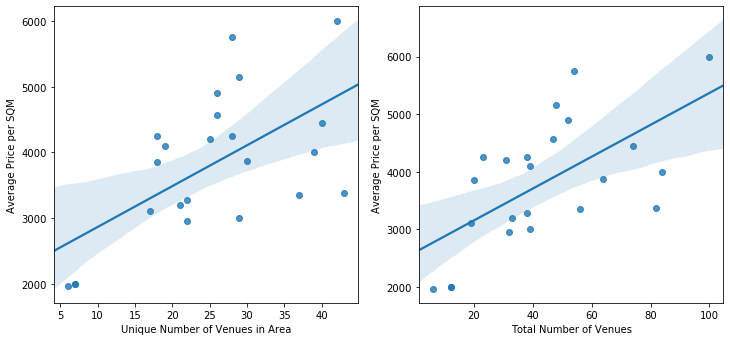

In [16]:
#remove areas that are close to the beach
beirut_v = beirut[(beirut['Area'] != 'Ramlet el Baida') & (beirut['Area'] != 'Raouche,Sakiet el Janzir') & (beirut['Area'] != 'Manara') & (beirut['Area'] != 'Ras Beirut')]
x = beirut_v[['Unique Venues']]
x1 = beirut_v[['Total No of Venues']]
y = beirut_v['Average Price per SQM'].replace('\$','',regex=True).replace(',','',regex=True).astype(int)
fig = plt.figure(figsize=(12, 12))
plt.subplot(2,2,1)
plt.xlabel('Unique Number of Venues in Area') # add y-label to the plot

sns.regplot(x,y)
plt.subplot(2,2,2)
plt.xlabel('Total Number of Venues') # add y-label to the plot

sns.regplot(x1,y)

### Add top 3 veneus in the beirut dataframe


In [17]:
beirut.corr()

,Average Rental Price 100M Appartment,Total No of Venues,Unique Venues
Average Rental Price 100M Appartment,1.000000,0.313038,0.239265
Total No of Venues,0.313038,1.000000,0.939380
Unique Venues,0.239265,0.939380,1.000000


In [18]:
beirut_v.corr()

,Average Rental Price 100M Appartment,Total No of Venues,Unique Venues
Average Rental Price 100M Appartment,1.000000,0.628555,0.607564
Total No of Venues,0.628555,1.000000,0.935158
Unique Venues,0.607564,0.935158,1.000000


### Analyze venues in each area in beirut

In [19]:
# one hot encoding
beirut_onehot = pd.get_dummies(beirut_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
beirut_onehot['Area'] = beirut_venues['Area'] 

# move neighborhood column to the first column
fixed_columns = [beirut_onehot.columns[-1]] + list(beirut_onehot.columns[:-1])
beirut_onehot = beirut_onehot[fixed_columns]

beirut_onehot

,Area,Accessories Store,American Restaurant,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,BBQ Joint,...,Tex-Mex Restaurant,Thai Restaurant,Theater,Toy / Game Store,Turkish Restaurant,Video Game Store,Video Store,Wine Bar,Women's Store,Yoga Studio
0,"Georges Haimari,Sassine",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Georges Haimari,Sassine",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Georges Haimari,Sassine",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Georges Haimari,Sassine",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Georges Haimari,Sassine",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117,Ras Beirut,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1118,Ras Beirut,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1119,Ras Beirut,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1120,Ras Beirut,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Normalize

### Group categories of Areas and take the mean of the category / all categories in the area. Put the analyzed areas in dataframe 'beirut_grouped'

In [20]:
beirut_grouped = beirut_onehot.groupby('Area').mean().reset_index()
beirut_grouped.head()

,Area,Accessories Store,American Restaurant,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,BBQ Joint,...,Tex-Mex Restaurant,Thai Restaurant,Theater,Toy / Game Store,Turkish Restaurant,Video Game Store,Video Store,Wine Bar,Women's Store,Yoga Studio
0,Ain el Mreisseh,0.0,0.000000,0.00,0.000000,0.018519,0.000000,0.018519,0.018519,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,Badaro,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.030303,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,Beirut Downtown,0.0,0.010000,0.01,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,"Clemenceau,Kantari",0.0,0.013514,0.00,0.000000,0.013514,0.000000,0.000000,0.000000,0.0,...,0.000000,0.013514,0.040541,0.0,0.0,0.0,0.0,0.0,0.0,0.013514
4,Furn el Hayek,0.0,0.000000,0.00,0.026316,0.000000,0.026316,0.000000,0.000000,0.0,...,0.026316,0.000000,0.026316,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


### Return most common 10 categories in each area

In [21]:
import numpy as np
num_top_venues = 10

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Area']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Area'] = beirut_grouped['Area']

for ind in np.arange(beirut_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(beirut_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Area,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Ain el Mreisseh,Hotel,Café,Lounge,Lebanese Restaurant,Italian Restaurant,Seafood Restaurant,Pool,Mediterranean Restaurant,Middle Eastern Restaurant,Grocery Store
1,Badaro,Pub,Bar,Café,Gastropub,Restaurant,Bistro,Cocktail Bar,Electronics Store,Spanish Restaurant,Middle Eastern Restaurant
2,Beirut Downtown,Café,French Restaurant,Restaurant,Boutique,Cocktail Bar,Nightclub,Lounge,Pub,Coffee Shop,Steakhouse
3,"Clemenceau,Kantari",Café,Hotel,Lebanese Restaurant,Theater,Pub,Coffee Shop,Lounge,Mediterranean Restaurant,Harbor / Marina,Diner
4,Furn el Hayek,Hotel,Sushi Restaurant,Italian Restaurant,Restaurant,Middle Eastern Restaurant,Convenience Store,Art Museum,Japanese Restaurant,Dessert Shop,Theater


## Modeling

### Cluster areas in beirut according their surrounding venues

In [22]:
from sklearn.cluster import KMeans
k_means = KMeans(init="k-means++", n_clusters=5, n_init=12)
k_means.fit(beirut_grouped.drop('Area',1))
k_means.labels_ 

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 3, 1, 0, 2, 4, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 3], dtype=int32)

For n_clusters = 2 The average silhouette_score is : 0.46837975726675474
For n_clusters = 3 The average silhouette_score is : 0.3324706997360558
For n_clusters = 4 The average silhouette_score is : 0.10634676955043133
For n_clusters = 5 The average silhouette_score is : 0.12508514061317866
For n_clusters = 6 The average silhouette_score is : 0.10768046422316065
For n_clusters = 7 The average silhouette_score is : 0.11107358459796599
For n_clusters = 8 The average silhouette_score is : 0.08674210175341333
For n_clusters = 9 The average silhouette_score is : 0.08848261088351407


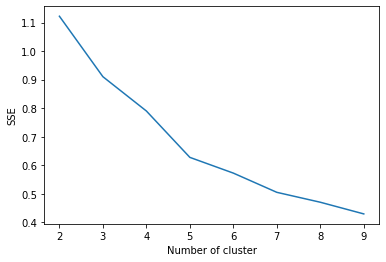

In [25]:
from sklearn.metrics import silhouette_score
data = beirut_grouped.drop('Area',1)
sse = {}
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data)
    #data["clusters"] = kmeans.labels_
    #print(data["clusters"])
    cluster_labels = kmeans.labels_
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    silhouette_avg = silhouette_score(data, cluster_labels)
    print("For n_clusters =", k,
          "The average silhouette_score is :", silhouette_avg)
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [26]:
# add clustering labels
neighborhoods_venues_sorted['Cluster Labels']= k_means.labels_
beirut_areas_clustered = neighborhoods_venues_sorted
beirut_areas_clustered.head()

,Area,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
0,Ain el Mreisseh,Hotel,Café,Lounge,Lebanese Restaurant,Italian Restaurant,Seafood Restaurant,Pool,Mediterranean Restaurant,Middle Eastern Restaurant,Grocery Store,0
1,Badaro,Pub,Bar,Café,Gastropub,Restaurant,Bistro,Cocktail Bar,Electronics Store,Spanish Restaurant,Middle Eastern Restaurant,1
2,Beirut Downtown,Café,French Restaurant,Restaurant,Boutique,Cocktail Bar,Nightclub,Lounge,Pub,Coffee Shop,Steakhouse,0
3,"Clemenceau,Kantari",Café,Hotel,Lebanese Restaurant,Theater,Pub,Coffee Shop,Lounge,Mediterranean Restaurant,Harbor / Marina,Diner,0
4,Furn el Hayek,Hotel,Sushi Restaurant,Italian Restaurant,Restaurant,Middle Eastern Restaurant,Convenience Store,Art Museum,Japanese Restaurant,Dessert Shop,Theater,0


### Since Beirut is a diverse where all types of venues are found all around the city, it is hard to classify areas and classification will not work well. To get better classification and compare it with prices we will apply classification algorith kmeans on the top rated 10 venues.

### Group by area and sort by top 10 venues

In [27]:
from pandas.core.common import flatten

top10_cat_list =[] 
areas_cat = neighborhoods_venues_sorted.drop('Area',axis = 1 )

cat_list = areas_cat.iloc[:,0:10].values.tolist()
cat_list = list(set(flatten(cat_list)))
cat_list
beirut_grouped_top10 = beirut_onehot[[*cat_list]]
beirut_grouped_top10['Area'] = beirut_venues['Area']
fixed_columns = [beirut_grouped_top10.columns[-1]] + list(beirut_grouped_top10.columns[:-1])
beirut_grouped_top10 = beirut_grouped_top10[fixed_columns]
beirut_grouped_top10 = beirut_grouped_top10.groupby('Area').mean().reset_index()
beirut_grouped_top10.head()

,Area,Lounge,Bar,Creperie,Yoga Studio,Candy Store,Bank,Furniture / Home Store,Bistro,Food Court,...,Dance Studio,Lingerie Store,Food Truck,Garden,Falafel Restaurant,Italian Restaurant,Hotel Bar,Arts & Crafts Store,Beach,Electronics Store
0,Ain el Mreisseh,0.074074,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00,...,0.000000,0.0,0.0,0.0,0.0,0.055556,0.018519,0.018519,0.0,0.000000
1,Badaro,0.030303,0.121212,0.0,0.000000,0.0,0.0,0.000000,0.060606,0.00,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.030303
2,Beirut Downtown,0.030000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.01,...,0.000000,0.0,0.0,0.0,0.0,0.030000,0.000000,0.000000,0.0,0.000000
3,"Clemenceau,Kantari",0.040541,0.000000,0.0,0.013514,0.0,0.0,0.013514,0.000000,0.00,...,0.013514,0.0,0.0,0.0,0.0,0.027027,0.013514,0.000000,0.0,0.000000
4,Furn el Hayek,0.026316,0.026316,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00,...,0.000000,0.0,0.0,0.0,0.0,0.078947,0.000000,0.000000,0.0,0.000000


### Now Perform kmeans clustering

For n_clusters = 2 The average silhouette_score is : 0.7187496943055522
For n_clusters = 3 The average silhouette_score is : 0.731504470877301
For n_clusters = 4 The average silhouette_score is : 0.45871956821657345
For n_clusters = 5 The average silhouette_score is : 0.2008408777817714
For n_clusters = 6 The average silhouette_score is : 0.20104356376433166
For n_clusters = 7 The average silhouette_score is : 0.12392589528354492
For n_clusters = 8 The average silhouette_score is : 0.099560337949823
For n_clusters = 9 The average silhouette_score is : 0.11131794915767726


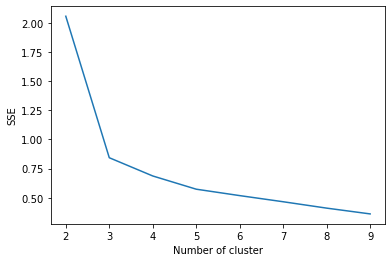

In [33]:
data = beirut_grouped_top10.drop('Area',1)
sse = {}
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, max_iter=50).fit(data)
    #data["clusters"] = kmeans.labels_
    #print(data["clusters"])
    cluster_labels = kmeans.labels_
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    silhouette_avg = silhouette_score(data, cluster_labels)
    print("For n_clusters =", k,
          "The average silhouette_score is :", silhouette_avg)
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [59]:
from sklearn.cluster import KMeans
k_means = KMeans(init="k-means++", n_clusters=3, max_iter=100)
k_means.fit(beirut_grouped_top10.drop('Area',1))
k_means.labels_ 
# add clustering labels
beirut_grouped_top10['Cluster Labels']= k_means.labels_
beirut_areas_clustered = beirut_grouped_top10

beirut_areas_clustered['Area'] = beirut['Area']
fixed_columns = [beirut_areas_clustered.columns[-1]] + list(beirut_areas_clustered.columns[:-1])
beirut_areas_clustered = beirut_areas_clustered[fixed_columns]


### View Clusters on Map

In [60]:
beirut_clusterd = beirut_areas.merge(beirut_areas_clustered[['Area','Cluster Labels']])

Map_clustered = folium.Map(location=[loc.latitude, loc.longitude], zoom_start=14) # generate map centred to Toronto City
# add circle markers
for lat, lng, label,cluster in zip(beirut_clusterd['Latitude'], beirut_clusterd['Longitude'],beirut_clusterd['Area'],beirut_clusterd['Cluster Labels']):
        if cluster == 1:
            color='blue'
        elif cluster == 2:
            color = 'red'
        elif cluster == 0:
            color='green'
        folium.CircleMarker(
            [float(lat), float(lng)],
            radius=5,
            popup=label,
            fill=True,
            color=color,
            fill_color=color,
            fill_opacity=0.6).add_to(Map_clustered)
Map_clustered

## Examine Results (Clusters)

In [71]:
import numpy as np
num_top_venues = 10

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Area']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Area'] = beirut_grouped['Area']

for ind in np.arange(beirut_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(beirut_grouped.iloc[ind, :], num_top_venues)

c_p_area = pd.merge(neighborhoods_venues_sorted,beirut_clusterd[['Area','Cluster Labels']])
c_p_area.head()

,Area,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
0,Ain el Mreisseh,Hotel,Café,Lounge,Lebanese Restaurant,Italian Restaurant,Seafood Restaurant,Pool,Mediterranean Restaurant,Middle Eastern Restaurant,Grocery Store,0
1,Badaro,Pub,Bar,Café,Gastropub,Restaurant,Bistro,Cocktail Bar,Electronics Store,Spanish Restaurant,Middle Eastern Restaurant,0
2,Beirut Downtown,Café,French Restaurant,Restaurant,Boutique,Cocktail Bar,Nightclub,Lounge,Pub,Coffee Shop,Steakhouse,0
3,"Clemenceau,Kantari",Café,Hotel,Lebanese Restaurant,Theater,Pub,Coffee Shop,Lounge,Mediterranean Restaurant,Harbor / Marina,Diner,0
4,Furn el Hayek,Hotel,Sushi Restaurant,Italian Restaurant,Restaurant,Middle Eastern Restaurant,Convenience Store,Art Museum,Japanese Restaurant,Dessert Shop,Theater,0


### Get Veues of cluster 1

In [72]:
#print((c_p_area[c_p_area['Cluster Labels'] == 0])['Area'])
c_p_area1 = c_p_area.iloc[:,1:][c_p_area['Cluster Labels'] == 0]
c_p_area1 = c_p_area1.values.tolist()
c_p_area1 = list(set(flatten(c_p_area1)))

# for consistancy let us group all values that has restaurants in restaurants
c_p_area1 = [x for x in c_p_area1 if not isinstance(x, int)]
c_p_area1 = ["Restaurant" if "Restaurant" in x else x for x in c_p_area1]
c_p_area1 = list(set(c_p_area1))
print('The first cluster venues are ')
print(c_p_area1)

The first cluster venues are 
['Lounge', 'Bar', 'Creperie', 'Yoga Studio', 'Candy Store', 'Bank', 'Bistro', 'Food Court', 'Flower Shop', 'Bakery', 'Juice Bar', 'Pool', 'Sandwich Place', 'Bus Station', 'Diner', 'Soccer Field', 'Harbor / Marina', 'Dessert Shop', 'Salon / Barbershop', 'Food Service', 'Gastropub', 'Restaurant', 'Pizza Place', 'Frozen Yogurt Shop', 'Movie Theater', 'Coffee Shop', 'Liquor Store', 'Theater', 'Market', 'Hotel', 'Pedestrian Plaza', 'Gym / Fitness Center', 'Furniture / Home Store', 'Boutique', 'Café', 'Pub', 'Cocktail Bar', 'Fried Chicken Joint', 'Nightclub', 'Steakhouse', 'Art Museum', 'Ice Cream Shop', 'Gourmet Shop', 'Burger Joint', 'Other Repair Shop', 'Shopping Mall', 'Supermarket', 'Grocery Store', 'Music Venue', 'Clothing Store', 'Convenience Store', 'Shop & Service', 'Dance Studio', 'Lingerie Store', 'Food Truck', 'Garden', 'Hotel Bar', 'Arts & Crafts Store', 'Beach', 'Electronics Store']


### Get Venus of cluster 2

In [78]:
#print((c_p_area[c_p_area['Cluster Labels'] == 1])['Area'].tolist())
c_p_area2 = c_p_area.iloc[:,1:][c_p_area['Cluster Labels'] == 1]
c_p_area2 = c_p_area2.values.tolist()
c_p_area2 = list(set(flatten(c_p_area2)))

# for consistancy let us group all values that has restaurants in restaurants
c_p_area2 = [x for x in c_p_area2 if not isinstance(x, int)]
c_p_area2 = ["Restaurant" if "Restaurant" in x else x for x in c_p_area2]
c_p_area2 = list(set(c_p_area2))
print('The second cluster venues are')
print(c_p_area2)

The second cluster venues are
['Dessert Shop', 'Bar', 'Gym', 'Hotel', 'Gym / Fitness Center', 'Café', 'Pub', 'Bistro', 'Restaurant', 'Pizza Place', 'Pharmacy', 'Shopping Mall', 'Coffee Shop', 'Grocery Store', 'Cosmetics Shop', 'Beach']


### Get Venues of cluster 3

In [79]:
#print((c_p_area[c_p_area['Cluster Labels'] == 2])['Area'])
c_p_area3 = c_p_area.iloc[:,1:][c_p_area['Cluster Labels'] == 2]
c_p_area3 = c_p_area3.values.tolist()
c_p_area3 = list(set(flatten(c_p_area3)))

# for consistancy let us group all values that has restaurants in restaurants
c_p_area3 = [x for x in c_p_area3 if not isinstance(x, int)]
c_p_area3 = ["Restaurant" if "Restaurant" in x else x for x in c_p_area3]
c_p_area3 = list(set(c_p_area3))
print('The third cluster venues are')
print(c_p_area3)

The third cluster venues are
['Bar', 'Café', 'Pub', 'Cocktail Bar', 'Restaurant', 'Pizza Place']


## Pricing of Houshold sqm2 in Each Cluster

### Analysing Beirut areas: Beirut is divided into 3 clusters as per kmeans method for the most common venues in each area.
#### First Cluster: 

In [75]:
beirut_clusterd[['Area','Average Price per SQM']].sort_values('Average Price per SQM',ascending=True)[beirut_clusterd['Cluster Labels'] == 0].style.hide_index()

Area,Average Price per SQM
Mazraa,"$1,960"
Mar Elias Msaytbeh,"$2,000"
"Rizk Hospital,Nazareth,Corniche du Fleuve","$2,950"
Zqaq el Blat,$2000
"La Sagesse,Geitaoui","$3,000"
"Sioufi,Hay Sirian","$3,100"
Badaro,"$3,200"
"Mar Mikhael,Kobayate","$3,275"
"Sodeco,Monnot","$3,350"
Mar Mitr,"$3,375"


The prices show that beirut areas <b>'Mazraa'</b>, <b>'Mar Elias Msaytbeh'</b> ,<b>'Rizk Hospital,Nazareth,Corniche du Fleuve'</b>, <b> 'Zqaq el Blat' </b>, <b> 'La Sagesse,Geitaoui' </b>, <b>'Sioufi,Hay Sirian'</b>, <b>'Badaro'</b> and <b>'Mar Mikhael,Kobayate'</b> are the most affordable places in cluster number <b>One</b> 

#### Second Cluster: 

In [76]:
beirut_clusterd[['Area','Average Price per SQM']].sort_values('Average Price per SQM',ascending=True)[beirut_clusterd['Cluster Labels'] == 1].style.hide_index()

Area,Average Price per SQM
Tallet el-Khayat,"$4,250"
Saifi,"$4,900"
Ras Beirut,"$5,200"


The prices below in cluter 2 are relatively high prices because as data showed, these areas are commercial areas. The most affordable areas is <b>'Tallet el-Khayyat'</b>

#### Third Cluster: 

In [77]:
beirut_clusterd[['Area','Average Price per SQM']].sort_values('Average Price per SQM',ascending=True)[beirut_clusterd['Cluster Labels'] == 2].style.hide_index()

Area,Average Price per SQM
Gemmayzeh,"$3,875"


Since <b> Gemmeyze </b> area only has bars, pubs, bistros and restaurants nearby, then it is classified as a touristic area and usually touristic areas price per household sqm2 is high as it its shown in the result

# Conclusion

#### We conclude by analyzing clusters, that areas in cluster 1 are diverse areas, were you can find anything you want from furniture shops, repairs shops, Grocery Stores, Supermarkets, Movie theaters, children activity venues, gyms, salons/barber shops, Clothing Stores, Convenience Store... and much more. Areas in cluster 1 has also some nightlife from pubs and restaurants nearby. As for prices of apartment rent, you can find ranges of all prices from very cheap, to very expensive price of household sqm2.

#### Cluster 2 areas doenst have daily living facilities or amenities nearby. Cluster 2 includes day activity venues like 'shopping mall','fitness centers' and 'beach' as well as some nightlife like 'restaurants', bars, so the areas in cluster 2 are considered as commercial areas and are a good fit for short-visitors from business men, professionals or family visitors. As for the prices, areas in cluster 2 have expensive price of household sqm2 since they are considered as commercial areas.

#### For cluster 3, you can find only nightlife venues and fast food restaurants in areas in cluster 3, so tourists who are interested in nightlife would find it convenient to rent an apartment in cluster 3 areas. 



### So where should i live?

#### I - If you have a family and you want to settle in for sometime, or you want to live permenantly in the city, or even you preffer that all amenities are found nearby where you live, then you should search of appartments in the following areas where you can find a 100 msq2 apartment to rent ranging from approx from 816 US dollars to approx 1360 US dollars as a monthly rate
<ul>
    <b>
  <li>Mazraa</li>
  <li>Mar Elias Msaytbeh</li>
  <li>Rizk Hospital,Nazareth,Corniche du Fleuve</li>
  <li>Zqaq el Blat</li>
  <li>La Sagesse,Geitaoui</li>
  <li>Sioufi,Hay Sirian</li>
    <li>Mar Mikhael,Kobayate</li>
        </b>
</ul>

#### II - If you are visiting for a short time as a business trip, or for a family reunion or a conference then you should search for an apartment or hotel in the cluster 2 areas. Since cluster 2 areas are classified as commercial, prices are relatively high but the cheapest is Tallet khayyat Area where you can rent a 100msq2 apartment for around 1770 Us dollars as a monthly rate

#### III -If you are a tourist, or a visitor who interest only in nightlife then 'Gemmayze' is the place for you. You can rent a 100 msq2 apartment for around 1615 US dollars as a monthly rate 